In [9]:
import GEODATA as gd

runways = gd.readRunways()
runways

,NAME,geometry
0,HERVEY BAY AERODROME,"LINESTRING (17019436.162 -2915603.032, 1701799..."
1,HERVEY BAY AERODROME,"LINESTRING (17019436.162 -2915603.032, 1701799..."
2,MARYBOROUGH AIRPORT,"LINESTRING (17000555.262 -2939311.867, 1700006..."
3,MARYBOROUGH AIRPORT,"LINESTRING (17000063.230 -2938923.317, 1699978..."
4,MARYBOROUGH AIRPORT,"LINESTRING (17000063.230 -2938923.317, 1699993..."
...,...,...
585,FORREST AERODROME,"LINESTRING (14261533.917 -3612866.068, 1426152..."
586,FORREST AERODROME,"LINESTRING (14261527.238 -3611605.826, 1426152..."
587,FORREST AERODROME,"LINESTRING (14261158.771 -3611583.785, 1426152..."
588,FORREST AERODROME,"LINESTRING (14261527.238 -3611605.826, 1426276..."


In [14]:
# Draw Exclusion zone
sydney = runways.loc[runways['NAME'] == 'SYDNEY AIRPORT']
sydney.reset_index(drop=True, inplace=True)
sydney

,NAME,geometry
0,SYDNEY AIRPORT,"LINESTRING (16830197.381 -4022025.447, 1683081..."
1,SYDNEY AIRPORT,"LINESTRING (16828271.555 -4019070.836, 1682868..."
2,SYDNEY AIRPORT,"LINESTRING (16828682.323 -4020875.447, 1682947..."
3,SYDNEY AIRPORT,"LINESTRING (16830355.455 -4020392.401, 1682868..."
4,SYDNEY AIRPORT,"LINESTRING (16828682.323 -4020875.447, 1682743..."


In [45]:
from shapely.geometry import LineString

def perpendicular(lineString, len, side):
    
    left = lineString.parallel_offset(len, 'left')
    right = lineString.parallel_offset(len, 'right')
    
    if (side == 'top'):
        
        leftEnd = left.boundary[1]
        rightEnd = right.boundary[0]
        return LineString([leftEnd, rightEnd])
    
    elif (side == 'bottom'):
        
        leftEnd = left.boundary[0]
        rightEnd = right.boundary[1]
        return LineString([leftEnd, rightEnd])
    
    else:
        
        raise ValueError("Invalid value for side")
    

lineString = sydney.at[0, 'geometry']
coords = list(lineString.coords)
b_len = 2890
c_len = 1760
d_len = 5310
e_len = 680

# Determine line
rise = (coords[1][1] - coords[0][1])
run = (coords[1][0] - coords[0][0])
if (rise == 0):
    
    # Horizontal line
    top = lineString.parallel_offset(c_len, 'left')
    bottom = lineString.parallel_offset(c_len, 'right')
    right = perpendicular(lineString, c_len, top)
    right = right.buffer(b_len, single_sided=True)
    left = perpendicular(lineString, c_len, bottom)
    left = left.buffer(-b_len, single_sided=True)
    
elif (run == 0):
    
    # Vertical line
    left = lineString.parallel_offset(c_len, 'left')
    right = lineString.parallel_offset(c_len, 'right')
    top = perpendicular(lineString, c_len, 'top')
    top = top.buffer(b_len, single_sided=True)
    bottom = perpendicular(lineString, c_len, 'bottom')
    bottom = left.buffer(-b_len, single_sided=True)
    

else:
    
    # Line with slope
    grad = rise / run
    b = (coords[0][1]) - (grad * coords[0][0])
    y = grad*x + b

C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  leftEnd = left.boundary[1]
C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  rightEnd = right.boundary[0]
C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  leftEnd = left.boundary[0]
C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:17: ShapelyDeprecationWarning: __getitem__ for mu

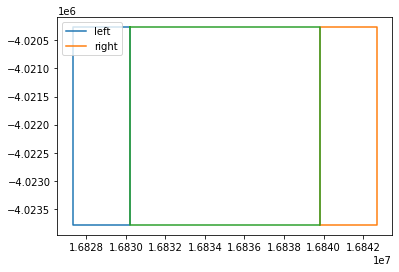

In [74]:
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

lineString = LineString([(16830197.38110897, -4022025.447476781), (16839816.317067254, -4022025.447476781)])

b_len = 2890
c_len = 1760
d_len = 5310
e_len = 680

# Horizontal line
top = lineString.parallel_offset(c_len, 'left')
bottom = lineString.parallel_offset(c_len, 'right')
mid = top.buffer(-2*c_len, single_sided=True)
right = perpendicular(lineString, c_len, 'top')
right = right.buffer(b_len, single_sided=True)
left = perpendicular(lineString, c_len, 'bottom')
left = left.buffer(-b_len, single_sided=True)

plt.plot(*left.exterior.xy, label='left')
plt.plot(*right.exterior.xy, label='right')
#plt.plot(*top.xy, label='top')
#plt.plot(*bottom.xy, label='bottom')
plt.plot(*mid.exterior.xy)
plt.legend(loc='upper left')
plt.show()

C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  leftEnd = left.boundary[1]
C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:11: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  rightEnd = right.boundary[0]
C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:16: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  leftEnd = left.boundary[0]
C:\Users\navni\AppData\Local\Temp\ipykernel_10896\1794126882.py:17: ShapelyDeprecationWarning: __getitem__ for mu

AttributeError: 'LineString' object has no attribute 'exterior'

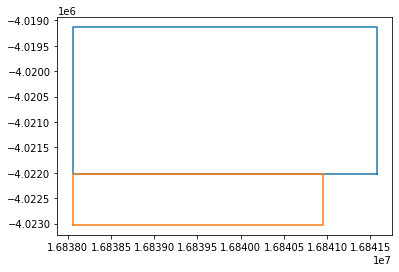

In [57]:
lineString = LineString([(16839816.317067254, -4023025.447476781), (16839816.317067254, -4022025.447476781)])

b_len = 2890
c_len = 1760
d_len = 5310
e_len = 680

# Horizontal line
left = lineString.parallel_offset(c_len, 'left')
right = lineString.parallel_offset(c_len, 'right')
top = perpendicular(lineString, c_len, 'top')
top = top.buffer(b_len, single_sided=True)
bottom = perpendicular(lineString, c_len, 'bottom')
bottom = left.buffer(-b_len, single_sided=True)

plt.plot(*top.exterior.xy)
plt.plot(*bottom.exterior.xy)
plt.plot(*left.exterior.xy)
plt.plot(*right.exterior.xy)
plt.show()